# Learning records on tf.data

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-rc0'

In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

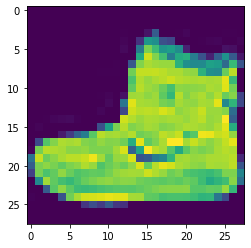

In [7]:
plt.imshow(train_images[0])

In [8]:
train_images=train_images/255.0
test_images=test_images/255.0

In [9]:
dataset_train_images=tf.data.Dataset.from_tensor_slices(train_images)

In [10]:
dataset_train_images

<TensorSliceDataset shapes: (28, 28), types: tf.float64>

In [11]:
dataset_train_labels=tf.data.Dataset.from_tensor_slices(train_labels)

In [12]:
dataset_train_labels

<TensorSliceDataset shapes: (), types: tf.uint8>

In [15]:
dataset_train=tf.data.Dataset.zip((dataset_train_images,dataset_train_labels))

In [16]:
dataset_train

<ZipDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [17]:
dataset_train=dataset_train.shuffle(10000).repeat().batch(64)

In [18]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
dataset_test_images=tf.data.Dataset.from_tensor_slices(test_images)
dataset_test_labels=tf.data.Dataset.from_tensor_slices(test_labels)

In [21]:
dataset_test=tf.data.Dataset.zip((dataset_test_images,dataset_test_labels))

In [23]:
dataset_test=dataset_test.batch(64)

In [22]:
steps_per_epoch=train_images.shape[0]//64

In [24]:
history=model.fit(dataset_train,epochs=5,steps_per_epoch=steps_per_epoch,validation_data=dataset_test)

Train for 937 steps, validate for 157 steps
Epoch 1/5
937/937 [==============================] - 7s 7ms/step - loss: 0.5231 - accuracy: 0.8189 - val_loss: 0.4390 - val_accuracy: 0.8457
Epoch 2/5
937/937 [==============================] - 3s 3ms/step - loss: 0.3903 - accuracy: 0.8612 - val_loss: 0.4169 - val_accuracy: 0.8475
Epoch 3/5
937/937 [==============================] - 3s 3ms/step - loss: 0.3524 - accuracy: 0.8735 - val_loss: 0.3732 - val_accuracy: 0.8650
Epoch 4/5
937/937 [==============================] - 3s 3ms/step - loss: 0.3259 - accuracy: 0.8826 - val_loss: 0.3829 - val_accuracy: 0.8657
Epoch 5/5
937/937 [==============================] - 3s 3ms/step - loss: 0.3092 - accuracy: 0.8877 - val_loss: 0.3642 - val_accuracy: 0.8716


In [25]:
history

In [26]:
history.history

{'loss': [0.5231102070151933,
  0.3902852506463276,
  0.35241222746566875,
  0.3259196140054959,
  0.30916115238451525],
 'accuracy': [0.8188534, 0.86124265, 0.8735159, 0.8826374, 0.8876901],
 'val_loss': [0.4390064220709406,
  0.41685872083636605,
  0.37316091330188095,
  0.38293073169744696,
  0.3642477844930758],
 'val_accuracy': [0.8457, 0.8475, 0.865, 0.8657, 0.8716]}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

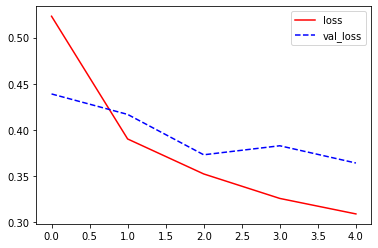

In [29]:
plt.plot(history.epoch,history.history['loss'],'r',label='loss')
plt.plot(history.epoch,history.history['val_loss'],'b--',label='val_loss')
plt.legend()

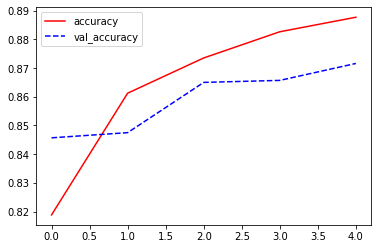

In [32]:
plt.plot(history.epoch,history.history['accuracy'],'r',label='accuracy')
plt.plot(history.epoch,history.history['val_accuracy'],'b--',label='val_accuracy')
plt.legend()